<a href="https://colab.research.google.com/github/icarocamelo/AbaloneRegression/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [5]:
!pip install seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Importing dataset and converting categorial data to numeric

A couple of things here:
1. Tried scaling data with `MinMaxScaler` but it didn’t bring any performance improvement. 
2. Converted `Sex` to numeric

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/icarocamelo-final-exam/dataset/Training_Data.csv'
column_names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']

# Read dataset
df = pd.read_csv(url, skiprows=1, names=column_names, header=None)

# Add age column (integer)
# Calculate age = rings * 1.5
# df['Age'] = [n * 1.5 for n in df['Rings'] ]

# Convert float to int
# df['Age'] = df['Age'].astype(int, errors = 'raise')

# Convert categorial to numeric
df.replace(to_replace='M', value = 1, inplace = True)
df.replace(to_replace='F', value = -1, inplace = True)
df.replace(to_replace='I', value = 0, inplace = True)

# Specifying columns name
df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
# df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings', 'Age']


###### MinMaxScaler ######
# # retrieve just the numeric input values
# data = df.values[:, :-1]
# # perform a robust scaler transform of the dataset
# from sklearn.preprocessing import MinMaxScaler
# trans = MinMaxScaler()
# data = trans.fit_transform(data)
# # print(data)

# df = pd.DataFrame(data, columns = column_names)

# # print(df)
# # print(type(df))

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
4,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


# EDA (Exploratory data analysis)


In [ ]:
# It takes some time to render
sns.pairplot(df)
# - Age and Sex don't seem to influence the number of 'Rings'
# Males are slightly larger than female and infants

# Describe dataset
df.describe()

## Checking average number of Rings

Average number of rings is between Nearly 8 and 13.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


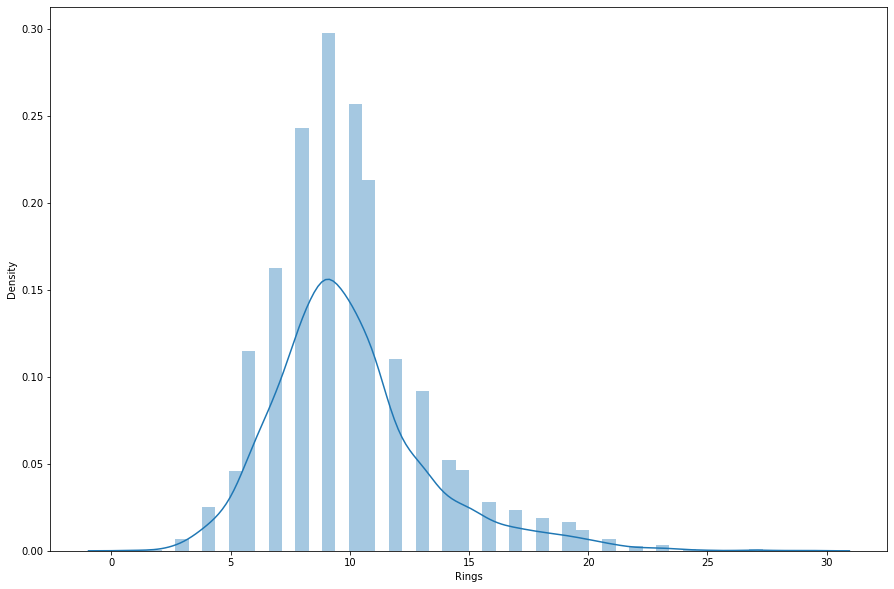

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Rings'])



## Verify correlation between attributes

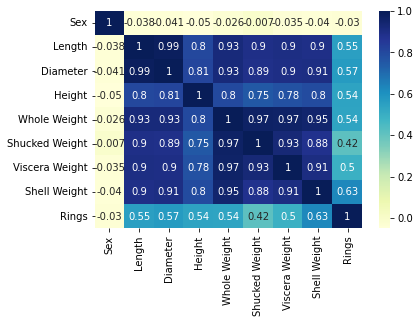

In [10]:
# Verify correlation between attributes
corr = df.corr()
# print(corr)

import matplotlib.pyplot as mp
import seaborn as sb 

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

## More visualization on feature relationships

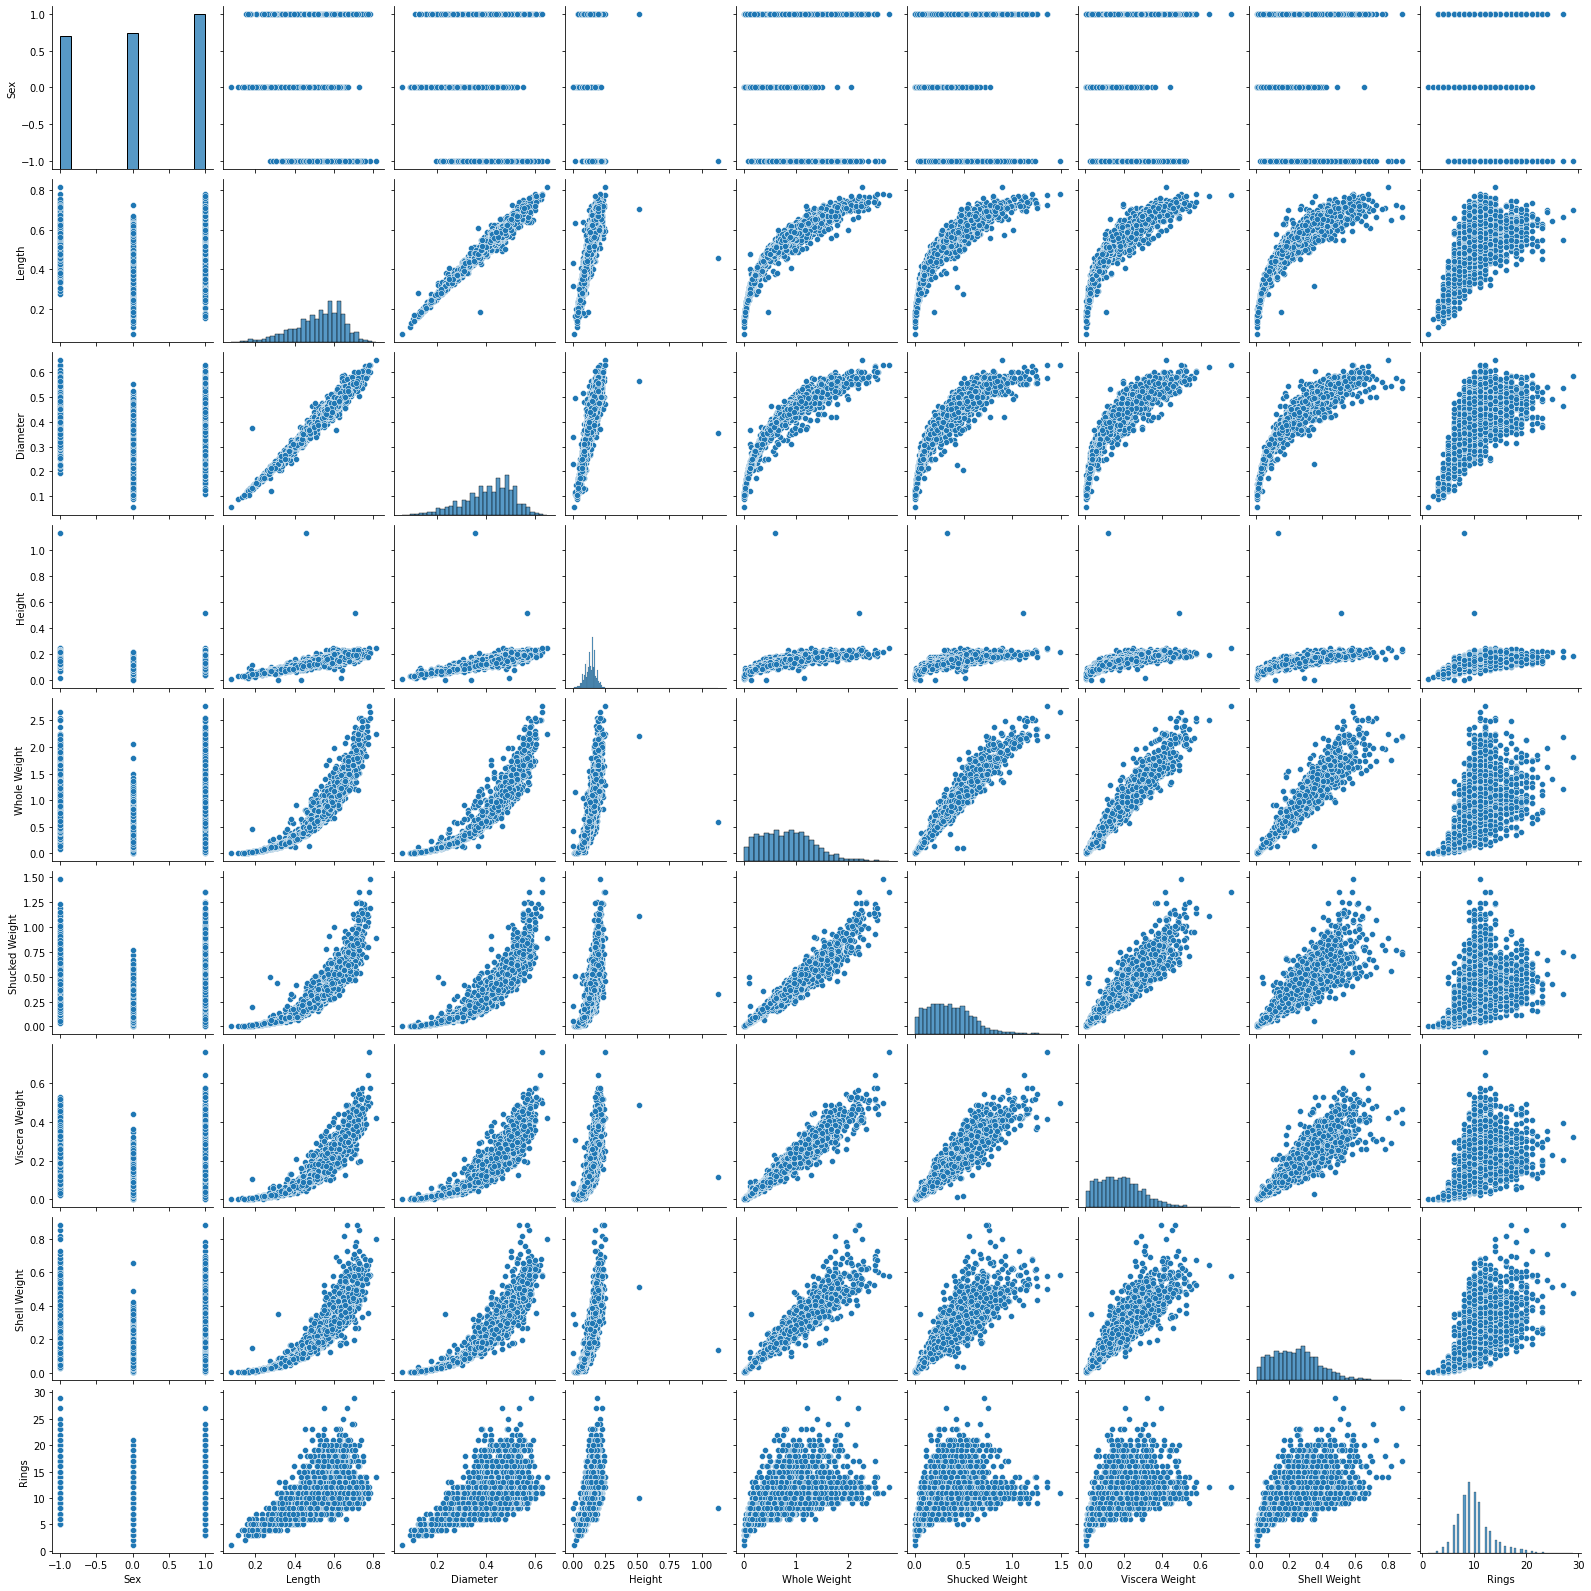

In [12]:
col_study = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
sns.pairplot(df[col_study], height=2.5)
plt.show()

# Analysing Results  

Most correlated attributes `[corr >= 0.4]`:
- Length x Rings: 0.55
- Diameter x Rings: 0.57
- Height x Rings: 0.54
- Whole Weight x Rings: 0.54
- Viscera Weight x Rings: 0.5
- Shell Weight x Rings: 0.63


By checking the graph we can notice that some features are highly correlated

  - Rings follows a normal distribution
  - Lenght x Diameter: linear distribution

We can remove variables that are not highly correlated `[corr < 0.4]` so the model can perform better.




# Linear regression

We want to predict the number of "Rings" depending upon the "Shell Weight" recorded. Therefore our attribute set will consist of the "Shell Weight" column which is stored in the X variable, and the label will be the "Rings" column which is stored in y variable.


   Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.425     0.300   0.095        0.3515          0.1410          0.0775   
4   0.530     0.415   0.150        0.7775          0.2370          0.1415   

   Shell Weight  
0         0.150  
1         0.070  
2         0.155  
3         0.120  
4         0.330  
     Actual  Predicted
0         6   7.568454
1        10   9.263332
2         7   7.398465
3        17  14.372613
4        13  12.324955
..      ...        ...
631      11   8.277094
632      14  10.183631
633      10  12.607743
634      10  10.671677
635      11  12.248356

[636 rows x 2 columns]
MSE: 4.702982348447887
RMSE: 2.1686360571677046
R2 score: 0.22069067936222564
**************


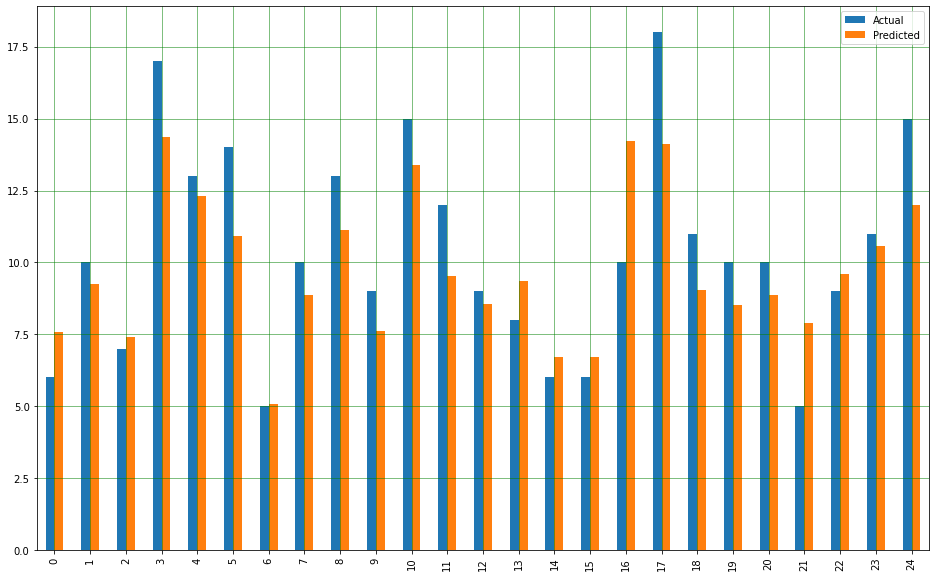

**************


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

df2 = df.copy()

df2.drop(columns=['Sex', 'Rings'], inplace=True)

print(df2.head())
X = df2

y = df['Rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

 # Training the algorithm
regressor.fit(X_train, y_train)

 # Predict
y_pred = regressor.predict(X_test)

 # Generate table (Actual vs Predicted)
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_results)

# Print metrics
print('MSE: ' + str(mse(y_pred, y_test)))
print('RMSE: ' + str(mse(y_pred, y_test, squared=False)))
print('R2 score: ' + str(r2_score(y_pred, y_test)))

print('**************')

# # Plot results
# plt.plot(y_test, y_pred, '.')
# x = np.linspace(0, 30, 100)
# y = x
# plt.plot(x, y)
# plt.show()
# print('**************')

# plot bar graph

df1 = df_results.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('**************')

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()

# Decision Tree

   Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.425     0.300   0.095        0.3515          0.1410          0.0775   
4   0.530     0.415   0.150        0.7775          0.2370          0.1415   

   Shell Weight  
0         0.150  
1         0.070  
2         0.155  
3         0.120  
4         0.330  
     Actual  Predicted
0         6        9.0
1        10        8.0
2         7        6.0
3        17       19.0
4        13       15.0
..      ...        ...
631      11       10.0
632      14        8.0
633      10       19.0
634      10       11.0
635      11       11.0

[636 rows x 2 columns]
**************
MSE: 9.261006289308176
RMSE: 3.043190150041265
R2 score: 0.18636001208500952
**************


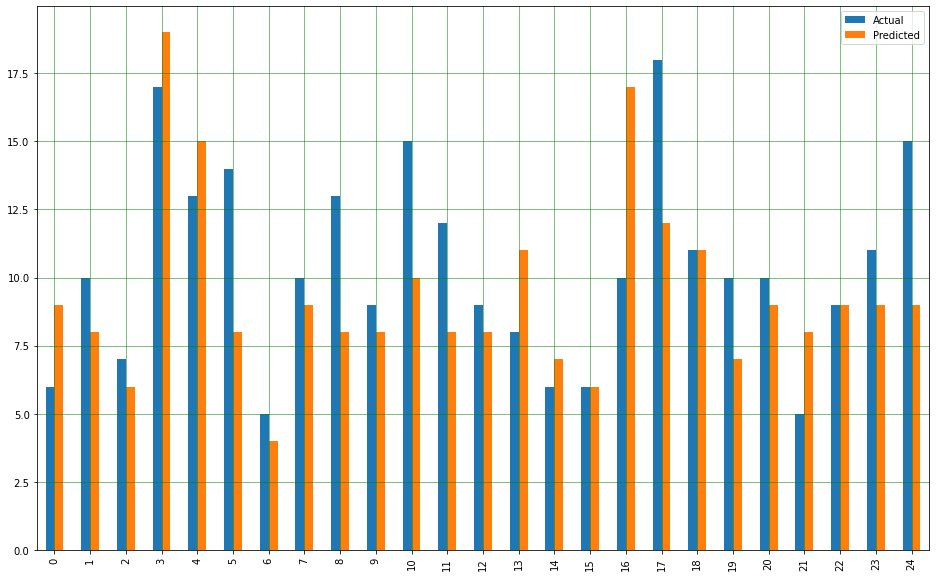

**************


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

df2 = df.copy()

df2.drop(columns=['Sex', 'Rings'], inplace=True)

print(df2.head())
X = df2

y = df['Rings'].values.reshape(-1,1)

from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(max_depth=5)
regressor = DecisionTreeRegressor(splitter="best")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


 # Generate table (Actual vs Predicted)
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_results)

# Print metrics
print('**************')
print('MSE: ' + str(mse(y_pred, y_test)))
print('RMSE: ' + str(mse(y_pred, y_test, squared=False)))
print('R2 score: ' + str(r2_score(y_pred, y_test)))
print('**************')

# # Plot results
# plt.plot(y_test, y_pred, '.')
# x = np.linspace(0, 30, 100)
# y = x
# plt.plot(x, y)
# plt.show()
# print('**************')

# plot bar graph

df1 = df_results.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('**************')

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()

# Random Forest

Random Forest performed better than other models after a minor tweak in the number of estimators. After '300` the model did not perform any better.

I manually started tweaking ***n_estimators***. Here's some results:
- n_estimators => score
- 100 => 0.30926271388023996
- 200 => 0.31885835385828165
- 250 => 0.315649259472532
- 300 => 0.3161430244352398

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

df2 = df.copy()

df2.drop(columns=['Sex', 'Rings'], inplace=True)

print(df2.head())
X = df2

y = df['Rings'].values.reshape(-1,1)


from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Manually played
regr = RandomForestRegressor(n_estimators=300)

# Optimized via GridSearch
# regr = RandomForestRegressor(
#       bootstrap = True,
#       max_depth = None,
#       max_features = 'sqrt',
#       min_samples_leaf = 2,
#       min_samples_split = 2,
#       n_estimators = 100
# )

regr.fit(X_train, y_train.ravel())

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

# Predict
y_pred = regr.predict(X_test)

 # Generate table (Actual vs Predicted)
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_results)


# Print metrics
print('**************')
print('MSE: ' + str(mse(y_pred, y_test)))
print('RMSE: ' + str(mse(y_pred, y_test, squared=False)))
print('R2 score: ' + str(r2_score(y_pred, y_test)))
print('**************')

print('**************')

# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()

   Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.425     0.300   0.095        0.3515          0.1410          0.0775   
4   0.530     0.415   0.150        0.7775          0.2370          0.1415   

   Shell Weight  
0         0.150  
1         0.070  
2         0.155  
3         0.120  
4         0.330  
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
   

# Randomized Search Cross validation

After the initial tweaking, I wanted to try some other parameters but in an automated way... something smarter. So, I found that Randomized Search could randomly try some parameters.

In the Randomized Search not all parameter values are tried out, but rather a fixed number of parameter settings that are tried is given by ***n_iter***.

In [16]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 6, cv = 5, verbose=2, random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_features, train_labels.ravel())

# Method to evaluate performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    # Look at parameters used by our current forest
    print('Parameters currently in use:\n')
    pprint(model.get_params())
    
    return accuracy


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels.ravel())
base_accuracy = evaluate(base_model, test_features, test_labels)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model Performance
Average Error: 3.2808 degrees.
Accuracy = 63.77%.
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Grid Search: finding best parameters

In [17]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
 'bootstrap': [True],
 'max_depth': [None, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [10, 100, 200]
}

print("Parameter grid: \n")
pprint(param_grid)
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels.ravel())
print("\nBest parameters:\n")
pprint(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

print('\nImprovement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Parameter grid: 

{'bootstrap': [True],
 'max_depth': [None, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [10, 100, 200]}
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best parameters:

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}
Model Performance
Average Error: 3.1501 degrees.
Accuracy = 65.26%.
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Improvement of 2.34%.


# Save model and Export predictions to CSV

In [ ]:
# Save predictions
# https://stackoverflow.com/questions/34864695/saving-prediction-results-to-csv

from google.colab import files
prediction = pd.DataFrame(df_results)

prediction.to_csv('prediction.csv') 
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>